<a href="https://colab.research.google.com/github/gamidirohan/DAA/blob/main/Lab_DAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab Assignment 1

Q1. Find the sum of first N natural numbers using Iterative and Recursive algorithms. Find the time taken to execute the same by varying ‘N’s value and plot it using python’s plot function.

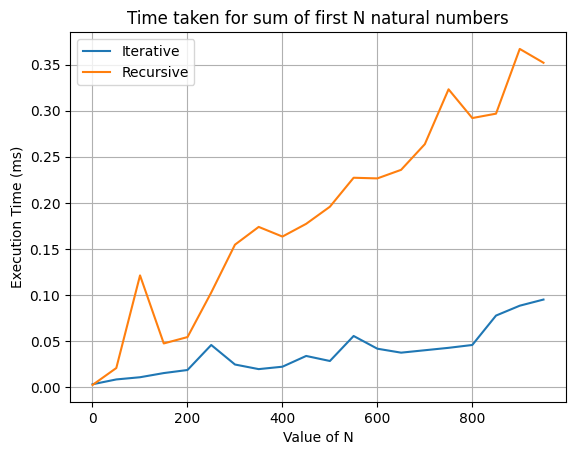

In [1]:
import time
import matplotlib.pyplot as plt

def iterative_sum(N):
    result = 0
    for i in range(1, N+1):
        result += i
    return result

def recursive_sum(N):
    if N == 0:
        return 0
    else:
        return N + recursive_sum(N-1)

def measure_execution_time(function, N):
    start_time = time.time()
    function(N)
    return (time.time() - start_time) * 1000  # Convert to milliseconds

# Varying values of N
N_values = list(range(1, 1001, 50))

# Measure time for iterative algorithm
iterative_times = [measure_execution_time(iterative_sum, N) for N in N_values]

# Measure time for recursive algorithm
recursive_times = [measure_execution_time(recursive_sum, N) for N in N_values]

# Plotting
plt.plot(N_values, iterative_times, label='Iterative')
plt.plot(N_values, recursive_times, label='Recursive')
plt.xlabel('Value of N')
plt.ylabel('Execution Time (ms)')
plt.title('Time taken for sum of first N natural numbers')
plt.legend()
plt.grid(True)
plt.show()

2. Perform linear and binary searches for an array of 10000 elements. Use random function in Python to generate the integer array elements in the range 1 to 1000. The search key is an input given by the user. Plot the time taken by the algorithm for 5 different searches when executing
the two algorithms.

Enter search key: 25
Enter search key: 11
Enter search key: 6
Enter search key: 3
Enter search key: 38


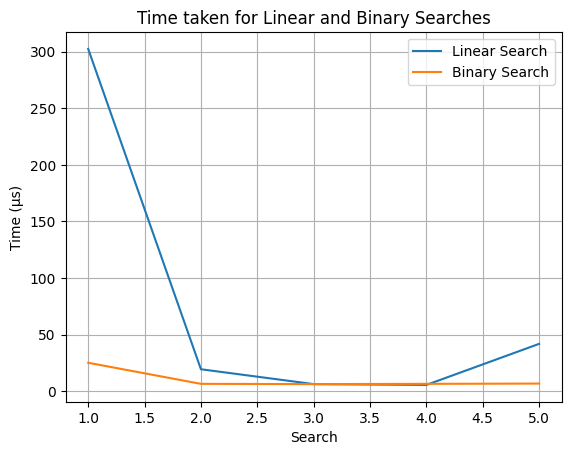

In [2]:
import random
import time
import matplotlib.pyplot as plt

def linear_search(arr, key):
    for i in range(len(arr)):
        if arr[i] == key:
            return i
    return -1

def binary_search(arr, key):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Generate random array of 10,000 elements
arr = [random.randint(1, 1000) for _ in range(10000)]

# Perform searches and measure time taken
search_keys = [int(input("Enter search key: ")) for _ in range(5)]

linear_times = []
binary_times = []

for key in search_keys:
    start_time = time.time()
    linear_search(arr, key)
    linear_times.append((time.time() - start_time) * 1000000)  # Convert to microseconds

    arr.sort()  # Binary search requires sorted array
    start_time = time.time()
    binary_search(arr, key)
    binary_times.append((time.time() - start_time) * 1000000)  # Convert to microseconds

# Plotting
plt.plot(range(1, 6), linear_times, label='Linear Search')
plt.plot(range(1, 6), binary_times, label='Binary Search')
plt.xlabel('Search')
plt.ylabel('Time (μs)')
plt.title('Time taken for Linear and Binary Searches')
plt.legend()
plt.grid(True)
plt.show()

3. Write a recursive function to convert the entered string of digits into the integer it represents. For example, 13531 represents the integer 13,531.

In [3]:
def string_to_integer(s):
    # Base case: if the string is empty, return 0
    if len(s) == 0:
        return 0

    # Extract the first character of the string
    first_digit = int(s[0])

    # Recursively convert the remaining substring into an integer
    remaining_integer = string_to_integer(s[1:])

    # Calculate the integer represented by the whole string
    return first_digit * (10 ** (len(s) - 1)) + remaining_integer

# Test the function
input_string = input("Enter a string of digits: ")
result = string_to_integer(input_string)
print("Integer representation:", result)

Enter a string of digits: 12355
Integer representation: 12355


4. Write a short recursive Python function that takes a character string s and outputs its reverse. For example, the reverse of pots&pans would be snap&stop.

In [4]:
def reverse_string(s):
    if len(s) <= 1:
        return s
    return reverse_string(s[1:]) + s[0]

# Test the function
input_string = input("Enter a string: ")
reversed_string = reverse_string(input_string)
print("Reversed string:", reversed_string)

Enter a string: pots&pans
Reversed string: snap&stop


5. Write a short recursive Python function that determines if a string s is a palindrome. For example, racecar and gohangasalamiimalasagnahog are palindromes.

In [7]:
def is_palindrome(s):
    # If the string has 0 or 1 character, it's a palindrome
    if len(s) <= 1:
        return True

    # Compare the first and last characters, and check if the inner substring is a palindrome
    if s[0] == s[-1]:
        # Recursively check if the inner substring is a palindrome
        return is_palindrome(s[1:-1])
    else:
        return False

# Test the function
input_string = input("Enter a string: ")
if is_palindrome(input_string):
    print("The string is a palindrome.")
else:
    print("The string is not a palindrome.")

Enter a string: gohangasalamiimalasagnahog
The string is a palindrome.


## Lab Assignment 2

1. Generate 1000 integer random numbers between 1 and 10000. Compare the sorting algorithms learnt in the class using the same set of numbers generated. Plot the time taken
for them to complete the process.

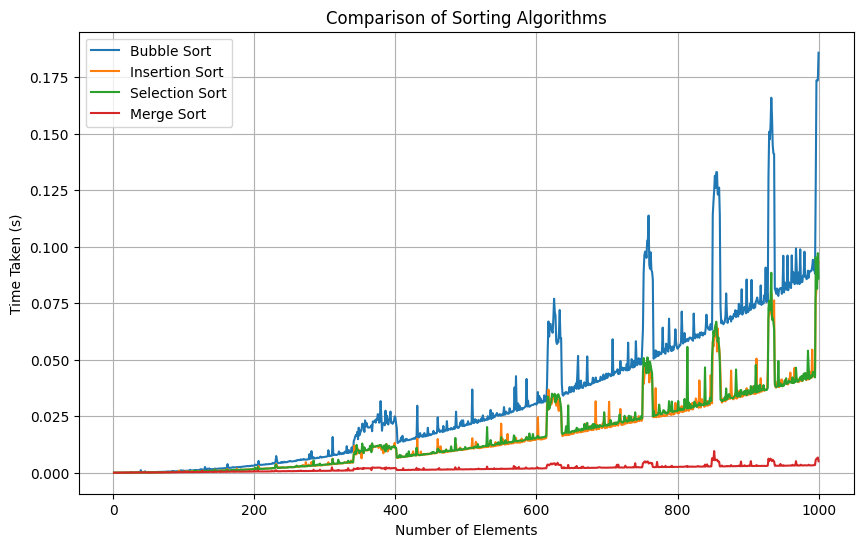

In [8]:
import random
import time
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def plot_comparison(times, labels):
    plt.figure(figsize=(10, 6))
    for i in range(len(times)):
        plt.plot(range(1, 1001), times[i], label=labels[i])
    plt.xlabel('Number of Elements')
    plt.ylabel('Time Taken (s)')
    plt.title('Comparison of Sorting Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate 1000 random integers between 1 and 10000
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Initialize lists to store time taken by each sorting algorithm
bubble_times = []
insertion_times = []
selection_times = []
merge_times = []

for i in range(1, 1001):
    arr = random_numbers[:i]

    # Bubble Sort
    start_time = time.time()
    bubble_sort(arr.copy())
    bubble_times.append(time.time() - start_time)

    # Insertion Sort
    start_time = time.time()
    insertion_sort(arr.copy())
    insertion_times.append(time.time() - start_time)

    # Selection Sort
    start_time = time.time()
    selection_sort(arr.copy())
    selection_times.append(time.time() - start_time)

    # Merge Sort
    start_time = time.time()
    merge_sort(arr.copy())
    merge_times.append(time.time() - start_time)

# Plotting
plot_comparison([bubble_times, insertion_times, selection_times, merge_times],
                ['Bubble Sort', 'Insertion Sort', 'Selection Sort', 'Merge Sort'])

2. Given ‘m’ sorted lists/ arrays, each containing ‘n’ elements, print them efficiently in sorted order.
[10, 20, 30, 40]
[15, 25, 35]
[27, 29, 37, 48, 93]
[32, 33]

In [9]:
import heapq

def merge_sorted_lists(sorted_lists):
    # Initialize an empty result list
    result = []

    # Initialize a min-heap to keep track of the smallest element from each list
    heap = []

    # Initialize the heap with the first element from each sorted list
    for i, lst in enumerate(sorted_lists):
        if lst:  # Ensure the list is not empty
            heapq.heappush(heap, (lst[0], i, 0))  # (value, list_index, element_index)

    # Iterate until the heap is empty
    while heap:
        # Pop the smallest element from the heap
        value, list_index, element_index = heapq.heappop(heap)

        # Append the smallest element to the result list
        result.append(value)

        # Move to the next element in the list from which the smallest element was taken
        element_index += 1

        # If there are more elements in the same list, push the next element to the heap
        if element_index < len(sorted_lists[list_index]):
            heapq.heappush(heap, (sorted_lists[list_index][element_index], list_index, element_index))

    return result

sorted_lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]

# Merge the sorted lists
result = merge_sorted_lists(sorted_lists)

# Print the sorted result
print(result)


[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


3. Given an array of size N, find the K largest elements in the array where K<<<N.

In [10]:
import heapq

def find_k_largest(nums, k):
    # Create a min-heap to store the K largest elements
    heap = []

    # Iterate through the array
    for num in nums:
        # If the heap is not yet full, or the current element is larger than the smallest element in the heap
        if len(heap) < k or num > heap[0]:
            # If the heap is already full, pop the smallest element
            if len(heap) == k:
                heapq.heappop(heap)
            # Push the current element to the heap
            heapq.heappush(heap, num)

    # The heap now contains the K largest elements, return them in sorted order
    return sorted(heap, reverse=True)

arr = [3, 1, 7, 5, 9, 2, 8]
K = 3
result = find_k_largest(arr, K)
print("The", K, "largest elements in the array are:", result)

The 3 largest elements in the array are: [9, 8, 7]


4. Given a set of activities, along with the starting and finishing time of each activity, find the maximum number of activities performed by a single person assuming that a person can
only work on a single activity at a time.

Input: Following set of activities
(1, 4), (3,5), (0,6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)

Output: (1, 4), (5, 7), (8, 11), (12, 14)

In [11]:
def max_activities(activities):
    # Sort activities based on finishing times
    activities.sort(key=lambda x: x[1])

    # Select the first activity
    selected_activities = [activities[0]]

    # Iterate through the remaining activities
    for i in range(1, len(activities)):
        # If the start time of the current activity is after the finish time of the last selected activity, select it
        if activities[i][0] >= selected_activities[-1][1]:
            selected_activities.append(activities[i])

    return selected_activities

# Input activities
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11), (8, 12), (2, 13), (12, 14)]

# Find the maximum number of activities
max_activity_list = max_activities(activities)

# Output
print("Maximum number of activities performed by a single person:")
print(max_activity_list)


Maximum number of activities performed by a single person:
[(1, 4), (5, 7), (8, 11), (12, 14)]


5. Given a set of intervals, print all non-overlapping intervals after merging the overlapping intervals.
Example: The set of intervals are:
(1, 4), (2, 5), (7, 8), (6, 9)
After merging these intervals, the intervals will become (1, 5), (6, 9)

In [14]:
def merge_intervals(intervals):
    # Sort intervals based on start times
    intervals.sort(key=lambda x: x[0])

    merged_intervals = []

    # Initialize start and end with first interval
    start, end = intervals[0]

    for interval in intervals[1:]:
        # Check if current interval overlaps with the previous one
        if interval[0] <= end:
            # Merge the intervals
            end = max(end, interval[1])
        else:
            # Add the merged interval to the result list
            merged_intervals.append((start, end))
            # Update start and end with the current interval
            start, end = interval

    # Add the last merged interval to the result list
    merged_intervals.append((start, end))

    return merged_intervals

intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]

# Merge overlapping intervals
merged_intervals = merge_intervals(intervals)

# Output
print("Merged intervals after merging overlapping intervals:")
print(merged_intervals)

Merged intervals after merging overlapping intervals:
[(1, 5), (6, 9)]


## Lab Assignment 3

1. Given an unsorted integer array, find a pair with the given sum in it.
Input: nums = [8, 7, 2, 5, 3, 1]
target = 10

Output:
Pair found (8, 2)
or
Pair found (7, 3)

In [15]:
def find_pair_with_sum(nums, target):
    # Create an empty set to store seen elements
    seen = set()

    # Iterate through the array
    for num in nums:
        # Calculate the complement of the current element with respect to the target
        complement = target - num

        # If the complement is in the set, we found a pair
        if complement in seen:
            print("Pair found: ({}, {})".format(complement, num))
            return True

        # Add the current element to the set
        seen.add(num)

    # If no pair is found
    print("No pair found with the given sum.")
    return False

nums = [8, 7, 2, 5, 3, 1]
target = 10

# Call the function
find_pair_with_sum(nums, target)


Pair found: (8, 2)


True

2. Given an unsorted integer array containing both positive and negative numbers, find a pair with maximum product in it. Input: If we have an array say arr = [1, 7, 4, 2, 8, 6, 3, 9, 5] Then in this array first two bigger numbers are 9 and 8.
So, product is 9*8=72 which is maximum product

In [17]:
def max_product_pair(nums):
    if len(nums) < 2:
        print("Array should contain at least two elements.")
        return None

    # Initialize variables to store the maximum and second maximum elements
    max1 = max(nums[0], nums[1])
    max2 = min(nums[0], nums[1])

    # Iterate through the array starting from the third element
    for i in range(2, len(nums)):
        if nums[i] > max1:
            max2 = max1
            max1 = nums[i]
        elif nums[i] > max2:
            max2 = nums[i]

    # Calculate and return the maximum product
    max_product = max1 * max2
    return max_product

# Example input
arr = [1, 7, 4, 2, 8, 6, 3, 9, 5]

# Call the function
result = max_product_pair(arr)

# Output the result
if result is not None:
    print("Maximum product pair:", result)

Maximum product pair: 72


4. Given a binary array of 0’s and 1’s. Segregate all 0’s followed by 1.
Input array = [0, 1, 0 ,1, 0, 0, 1, 1, 1, 0]
Output array = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [16]:
def segregate_zeros_and_ones(arr):
    left = 0
    right = len(arr) - 1

    while left < right:
        # Move the left pointer to the right until it encounters a 1
        while arr[left] == 0 and left < right:
            left += 1

        # Move the right pointer to the left until it encounters a 0
        while arr[right] == 1 and left < right:
            right -= 1

        # Swap the elements at the left and right pointers
        arr[left], arr[right] = arr[right], arr[left]

        # Move the pointers inward
        left += 1
        right -= 1

    return arr

# Example input
input_array = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]

# Call the function
output_array = segregate_zeros_and_ones(input_array.copy())

# Output the result
print("Output array:", output_array)

Output array: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


5. Write a program to implement inversion count. Given the Input (non-negative integers): A = {10 , 1 , 2 , 4 , 13 , 9 , 5 } The number of inversions that are possible are as follows:
{ ( 10 , 1 ) , ( 10 , 2 ) , ( 10 , 4 ) , ( 10 , 9 ) , ( 10 , 5 ) , ( 13 , 9 ) , ( 13 , 5 ) , ( 9 , 5 ) }
Total count of inversions are: 8

In [18]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr, 0

    mid = len(arr) // 2
    left_half, left_count = merge_sort(arr[:mid])
    right_half, right_count = merge_sort(arr[mid:])

    merged_array = []
    i = j = inv_count = 0

    while i < len(left_half) and j < len(right_half):
        if left_half[i] <= right_half[j]:
            merged_array.append(left_half[i])
            i += 1
        else:
            merged_array.append(right_half[j])
            j += 1
            inv_count += len(left_half) - i

    merged_array.extend(left_half[i:])
    merged_array.extend(right_half[j:])

    return merged_array, left_count + right_count + inv_count

# Function to calculate inversion count
def inversion_count(arr):
    _, count = merge_sort(arr)
    return count

# Example input
A = [10, 1, 2, 4, 13, 9, 5]

# Calculate inversion count
count = inversion_count(A)

# Output the result
print("Total count of inversions:", count)

Total count of inversions: 8


6. An array contains N numbers, and you want to determine whether two of the numbers sum to a given number K. For example, if the input is 8, 4, 1, 6 and K is 10, the answer is yes (4 and 6). A number may be used twice. a. Give an 𝑂(𝑛2) algorithm to solve this problem.

In [19]:
def has_pair_with_sum_n2(nums, K):
    n = len(nums)
    for i in range(n):
        for j in range(i+1, n):
            if nums[i] + nums[j] == K:
                return True
    return False

# Example input
nums = [8, 4, 1, 6]
K = 10

# Check if there is a pair with sum K
result = has_pair_with_sum_n2(nums, K)

# Output the result
if result:
    print("Yes, there is a pair with sum", K)
else:
    print("No, there is no pair with sum", K)


Yes, there is a pair with sum 10


b. Give an 𝑂(𝑛𝑙𝑜𝑔𝑛) algorithm to solve this problem.
(Hint: first sort the array and then solve the problem in linear time).

In [20]:
def has_pair_with_sum_nlogn(nums, K):
    nums.sort()
    left = 0
    right = len(nums) - 1
    while left < right:
        curr_sum = nums[left] + nums[right]
        if curr_sum == K:
            return True
        elif curr_sum < K:
            left += 1
        else:
            right -= 1
    return False

# Example input
nums = [8, 4, 1, 6]
K = 10

# Check if there is a pair with sum K
result = has_pair_with_sum_nlogn(nums, K)

# Output
if result:
    print("Yes, there is a pair with sum", K)
else:
    print("No, there is no pair with sum", K)

Yes, there is a pair with sum 10
